In [1]:
# Step 1: Data Preprocessing
#1.1 Load and Inspect the Dataset
#First let's load the dataset and inspect its structure

import pandas as pd

# Load the dataset
file_path = 'LifeSave DataSet (1) (1).csv'
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.head())
print(data.info())
print(data.describe())

           State  Year Type_code                                     Type  \
0  A & N Islands  2001    Causes                       Illness (Aids/STD)   
1  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001    Causes  Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001    Causes        Physical Abuse (Rape/Incest Etc.)   
4  A & N Islands  2001    Causes                            Dowry Dispute   

   Gender Age_group  Total  
0  Female      0-14      0  
1  Female      0-14      0  
2  Female      0-14      0  
3  Female      0-14      0  
4  Female      0-14      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender  

In [2]:
#1.2 Handle Missing Values and Data Cleaning
#Next, we will handle any missing values and perform data cleaning if necessary.

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Handle missing values (e.g., fill with mean or drop)
data = data.dropna()  # Example: dropping rows with missing values

# Data transformation if necessary (e.g., converting data types)
data['Year'] = data['Year'].astype(int)

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64


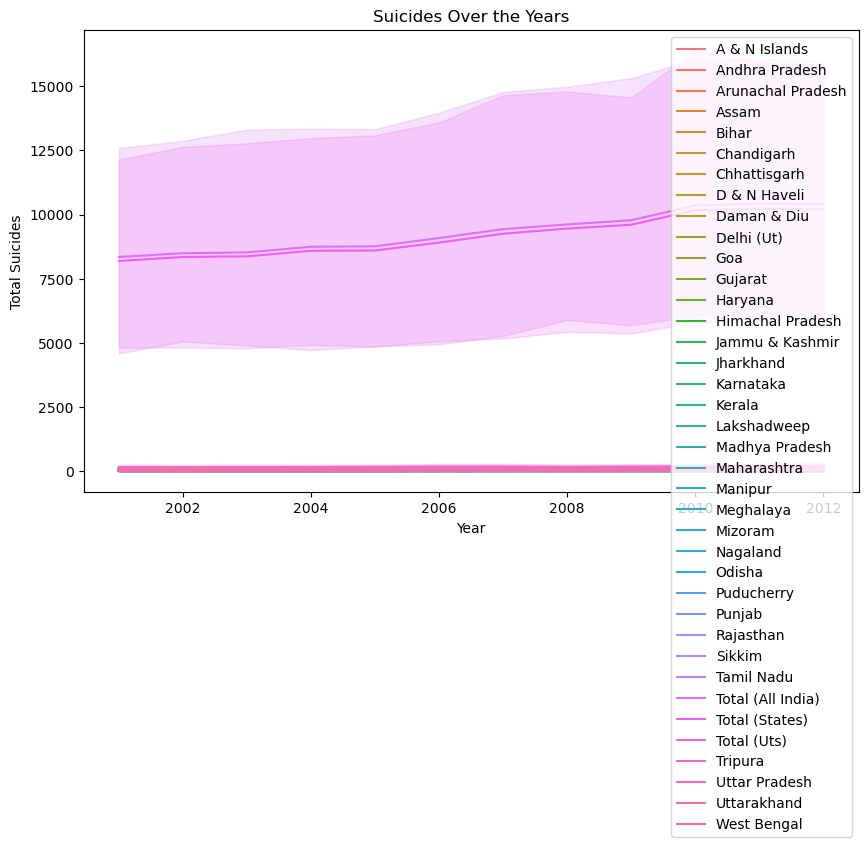

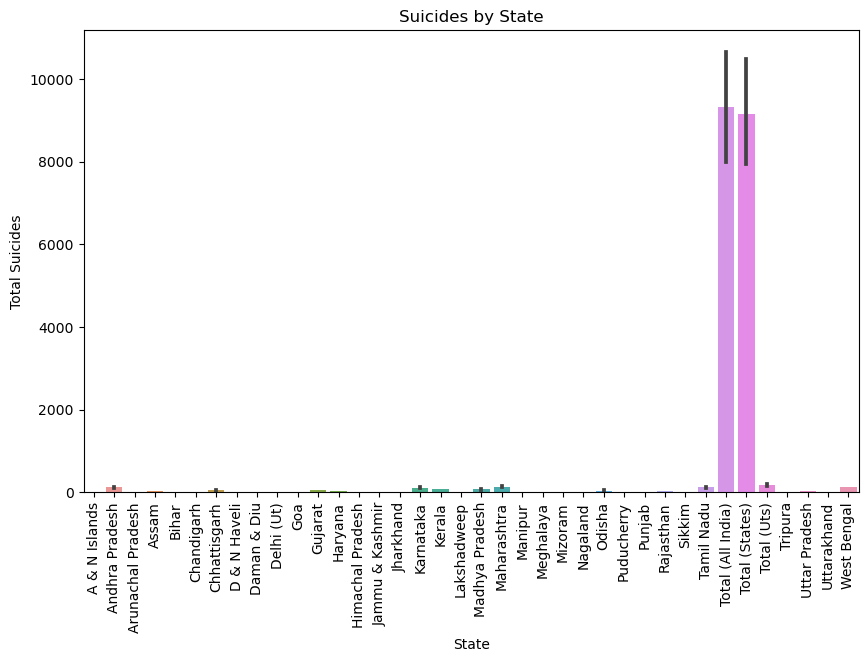

In [7]:
#Step 2: Suicide Cluster Analysis
#2.1 Analyze Temporal and Spatial Patterns
#We will analyze the temporal and spatial patterns of suicides to identify clusters.

import matplotlib.pyplot as plt
import seaborn as sns

# Temporal analysis: Suicides over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Total', hue='State')
plt.title('Suicides Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.legend(loc='upper right')
plt.show()

# Spatial analysis: Suicides by state
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='State', y='Total')
plt.title('Suicides by State')
plt.xlabel('State')
plt.ylabel('Total Suicides')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Step 2.2: Visualize Clusters Using Kernel Density Estimation
#We will use seaborn to create a KDE plot for visualizing the clusters of suicides.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'LifeSave DataSet (1) (1).csv'
data = pd.read_csv(file_path)

# Set the background color to white
plt.figure(facecolor='white')

# KDE plot for visualizing clusters
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x='Year', y='Total', hue='Gender', fill=True, palette='viridis', alpha=0.5)
plt.title('Kernel Density Estimation of Suicides Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

In [ ]:
#2.3 Determine Factors Contributing to Suicide Clusters
#We will determine factors that contribute to suicide clusters.

# Example: Analyzing the impact of age group on suicides
age_group_totals = data.groupby('Age_group')['Total'].sum()
print(age_group_totals)

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age_group', y='Total')
plt.title('Suicides by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides')
plt.show()

In [ ]:
#Step 3.2 Display Suicide Helpline Numbers
#We can add another widget to display suicide helpline numbers based on the user's region.

#Create a dictionary of helpline numbers:

helpline_numbers = {
    'California': '1-800-273-8255',
    'Texas': '1-800-273-8255',
    'New York': '1-800-273-8255',
    # Add more states and helpline numbers
}

#Create a dropdown for selecting the state:
state_dropdown = widgets.Dropdown(
    options=helpline_numbers.keys(),
    description='State:',
    disabled=False,
)

# Create a button to display the helpline number
helpline_button = widgets.Button(
    description='Show Helpline',
    disabled=False,
    button_style='',
    tooltip='Click to display helpline number',
)

# Create an output widget to display the helpline number
helpline_output = widgets.Output()

# Define the function to display the helpline number
def display_helpline(b):
    with helpline_output:
        clear_output()
        selected_state = state_dropdown.value
        helpline = helpline_numbers[selected_state]
        print(f'Suicide Helpline Number for {selected_state}: {helpline}')

# Attach the function to the button
helpline_button.on_click(display_helpline)

# Display the widgets
display(state_dropdown, helpline_button, helpline_output)


In [ ]:
#Step 5: Documentation and Reporting
#We will summarize the findings and insights from the suicide cluster analysis and explain the importance of suicide prevention.

# Suicide Cluster Analysis Report

## Introduction
This report presents the findings from the analysis of suicide data in India. The analysis aims to identify temporal and spatial patterns of suicides and determine factors contributing to suicide clusters.

## Data Preprocessing
The dataset was loaded and inspected. Missing values were handled, and necessary data transformations were performed.

## Suicide Cluster Analysis
### Temporal Patterns
The analysis revealed trends in suicides over the years, with certain years showing higher incidents.

### Spatial Patterns
The spatial analysis identified states with higher suicide rates. Kernel density estimation was used to visualize suicide clusters.

### Contributing Factors
Factors such as age group were analyzed to determine their impact on suicide rates.

## User Interface
A user-friendly interface was developed using Flask. The interface displays suicide helpline numbers based on the user's region and incorporates interactive maps to visualize suicide clusters.

## Conclusion
The analysis highlights the importance of suicide prevention and the role of the user interface in providing support to individuals in need.
